In [211]:
import requests
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [122]:
# Step 1: Download the database file
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite"
filename = "m4_survey_data.sqlite"

# Download the file
print("Downloading database file...")
response = requests.get(url)
if response.status_code == 200:
    with open(filename, "wb") as file:
        file.write(response.content)
    print(f"Database file downloaded as {filename}")
else:
    print(f"Failed to download the database file. HTTP Status Code: {response.status_code}")
    exit()

Database file downloaded as m4_survey_data.sqlite


In [141]:
# Step 2: Connect to the SQLite database
conn = sqlite3.connect(filename)

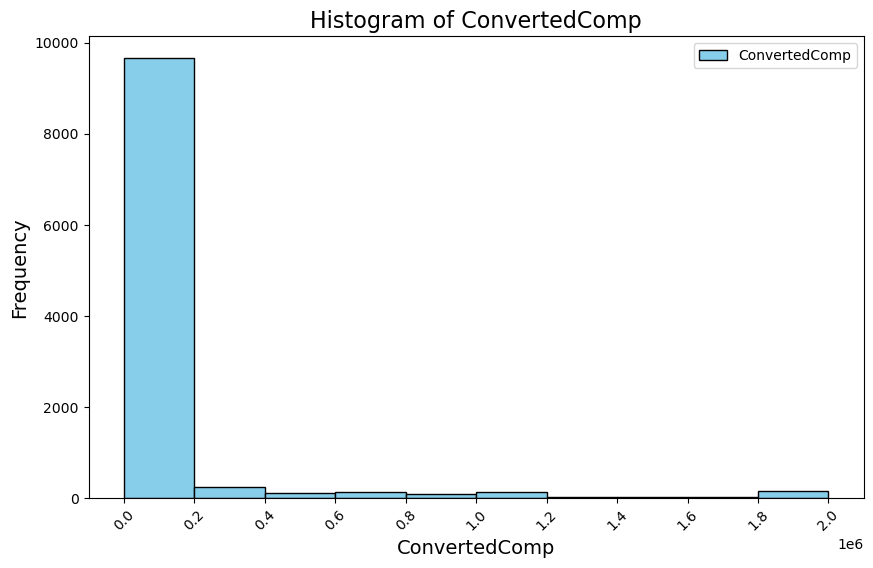

In [124]:
# your code goes here
query= """ SELECT ConvertedComp FROM master;"""
df=pd.read_sql_query(query,conn)
count,bin_edges=np.histogram(df.dropna())
df.plot.hist(figsize=(10,6),color='skyblue',edgecolor='black')
plt.title('Histogram of ConvertedComp', fontsize=16)
plt.xlabel('ConvertedComp', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(bin_edges, rotation=45)
#plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

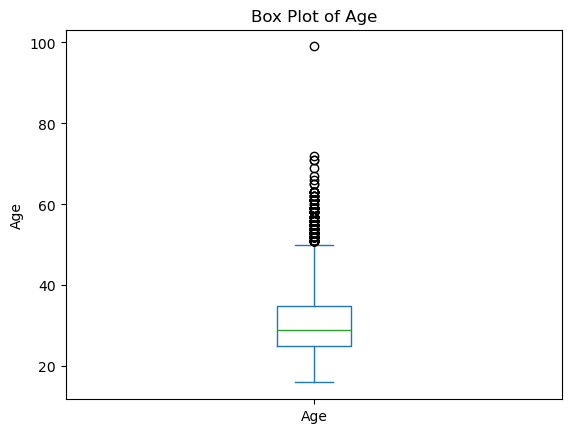

In [125]:
# Plotting 'Age' box plot
query= """ SELECT Age FROM master;"""
df1=pd.read_sql_query(query,conn)
df1.plot.box()
plt.title('Box Plot of Age')
plt.ylabel('Age')
plt.show()

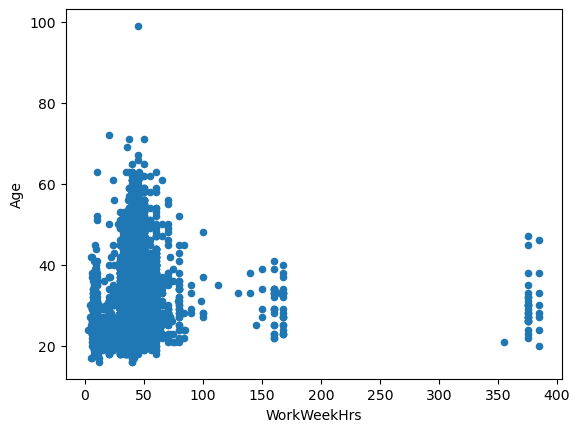

,Age,WorkWeekHrs
Age,1.000000,0.038814
WorkWeekHrs,0.038814,1.000000


In [126]:
query= """ SELECT Age, WorkWeekHrs FROM master where WorkWeekHrs<=400;"""
df2=pd.read_sql_query(query,conn)
df2.plot.scatter(x='WorkWeekHrs', y='Age')
plt.show()
df2.corr()

In [161]:
df2.columns

Index(['Age', 'WorkWeekHrs'], dtype='object')

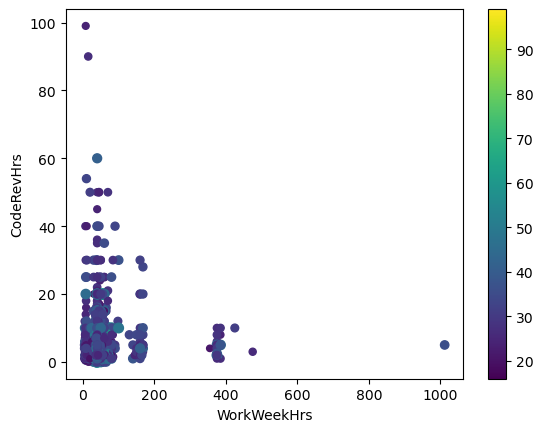

In [128]:
query= """ SELECT Age, WorkWeekHrs, CodeRevHrs FROM master;"""
df3=pd.read_sql_query(query,conn)
age=df3['Age']
df3.plot.scatter(x='WorkWeekHrs', y='CodeRevHrs', s=age, c=age, cmap='viridis')
plt.show()

In [129]:
query= """ SELECT * FROM sqlite_master;"""
df4=pd.read_sql_query(query,conn)
#df4.plot.box()
with pd.option_context('display.max_columns', None):
    display(df4)

,type,name,tbl_name,rootpage,sql
0,table,EduOther,EduOther,2,"CREATE TABLE ""EduOther"" (\n""Respondent"" INTEGE..."
1,table,DevType,DevType,741,"CREATE TABLE ""DevType"" (\n""Respondent"" INTEGER..."
2,table,LastInt,LastInt,1024,"CREATE TABLE ""LastInt"" (\n""Respondent"" INTEGER..."
3,table,JobFactors,JobFactors,1355,"CREATE TABLE ""JobFactors"" (\n""Respondent"" INTE..."
4,table,WorkPlan,WorkPlan,1808,"CREATE TABLE ""WorkPlan"" (\n""Respondent"" INTEGE..."
5,table,WorkChallenge,WorkChallenge,2088,"CREATE TABLE ""WorkChallenge"" (\n""Respondent"" I..."
6,table,LanguageWorkedWith,LanguageWorkedWith,2378,"CREATE TABLE ""LanguageWorkedWith"" (\n""Responde..."
7,table,LanguageDesireNextYear,LanguageDesireNextYear,2638,"CREATE TABLE ""LanguageDesireNextYear"" (\n""Resp..."
8,table,DatabaseWorkedWith,DatabaseWorkedWith,2877,"CREATE TABLE ""DatabaseWorkedWith"" (\n""Responde..."
9,table,DatabaseDesireNextYear,DatabaseDesireNextYear,3028,"CREATE TABLE ""DatabaseDesireNextYear"" (\n""Resp..."


In [176]:
query= """ SELECT DatabaseWorkedWith, COUNT(DISTINCT Respondent) as TotalRespondents
FROM DatabaseWorkedWith
GROUP BY DatabaseWorkedWith
ORDER BY TotalRespondents DESC;
"""
df4=pd.read_sql_query(query,conn)
df4.set_index('DatabaseWorkedWith', inplace=True)
df4

,TotalRespondents
DatabaseWorkedWith,
MySQL,5469
Microsoft SQL Server,4110
PostgreSQL,4097
SQLite,3248
MongoDB,3016
Redis,2508
Elasticsearch,1954
Oracle,1744
MariaDB,1709


<Axes: ylabel='TotalRespondents'>

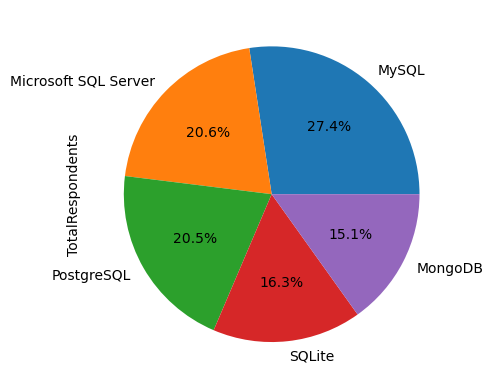

In [152]:
df4['TotalRespondents'].head().plot.pie(autopct='%1.1f%%')

In [192]:
query="""SELECT COUNT(Respondent) AS UniqueMySQLOnly
FROM (
    SELECT Respondent
    FROM DatabaseWorkedWith
    GROUP BY Respondent
    HAVING COUNT(*) = 1 AND MAX(DatabaseWorkedWith) = 'MySQL'
) AS SubQuery;

"""
df6=pd.read_sql_query(query,conn)
df6

,UniqueMySQLOnly
0,474


<Axes: ylabel='TotalRespondents'>

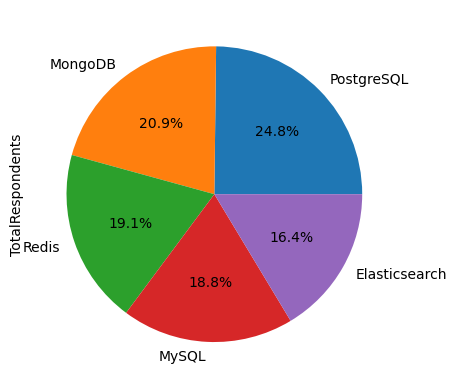

In [157]:
query= """ SELECT DatabaseDesireNextYear, count(Respondent) as TotalRespondents
FROM DatabaseDesireNextYear
GROUP BY DatabaseDesireNextYear
ORDER BY TotalRespondents DESC;
"""
df5=pd.read_sql_query(query,conn)
df5.set_index('DatabaseDesireNextYear', inplace=True)
df5['TotalRespondents'].head().plot.pie(autopct='%1.1f%%')
#df4[DatabaseDesireNextYear].plot.pie()
#with pd.option_context('display.max_columns', None):
    #display(df4.head(6))

In [159]:
query= """ SELECT LanguageDesireNextYear, Count(Respondent) as TotalRespondents
FROM LanguageDesireNextYear
GROUP BY LanguageDesireNextYear
ORDER BY TotalRespondents DESC;
"""
df4=pd.read_sql_query(query,conn)
df4.set_index('LanguageDesireNextYear', inplace=True)
df4

,TotalRespondents
LanguageDesireNextYear,
JavaScript,6630
HTML/CSS,5328
Python,5239
SQL,5012
TypeScript,4088
C#,3591
Bash/Shell/PowerShell,3097
Java,2953
Go,2759


,Age,MedianWorkWeekHrs,MedianCodeRevHrs
0,30.0,40.0,3.0
1,31.0,40.0,3.0
2,32.0,40.0,3.0
3,33.0,40.0,3.0
4,34.0,40.0,3.0
5,35.0,40.0,3.0


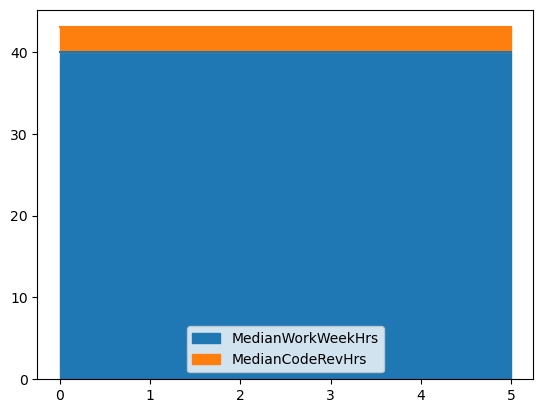

In [134]:
# your code goes here
query= """ SELECT Age,
       (SELECT WorkWeekHrs FROM master
        WHERE Age BETWEEN 30 AND 35
        ORDER BY WorkWeekHrs
        LIMIT 1 OFFSET (SELECT COUNT(*) FROM master WHERE Age BETWEEN 30 AND 35) / 2) AS MedianWorkWeekHrs,
       (SELECT CodeRevHrs FROM master
        WHERE Age BETWEEN 30 AND 35
        ORDER BY CodeRevHrs
        LIMIT 1 OFFSET (SELECT COUNT(*) FROM master WHERE Age BETWEEN 30 AND 35) / 2) AS MedianCodeRevHrs
FROM (SELECT DISTINCT Age FROM master WHERE Age BETWEEN 30 AND 35)
ORDER BY Age;
"""
df5=pd.read_sql_query(query,conn)
median_values = df5[['MedianWorkWeekHrs', 'MedianCodeRevHrs']]
median_values.plot.area()
df5

In [240]:
#Plot the median `ConvertedComp` for all ages from 45 to 60.
MedianConvertedComp=[]
Age=[]
for age in range(45,60+1):
    query= f""" SELECT ConvertedComp FROM master
    where age=={age};"""
    df5=pd.read_sql_query(query,conn)
    MedianConvertedComp.append(df5.median())
    Age.append(age)

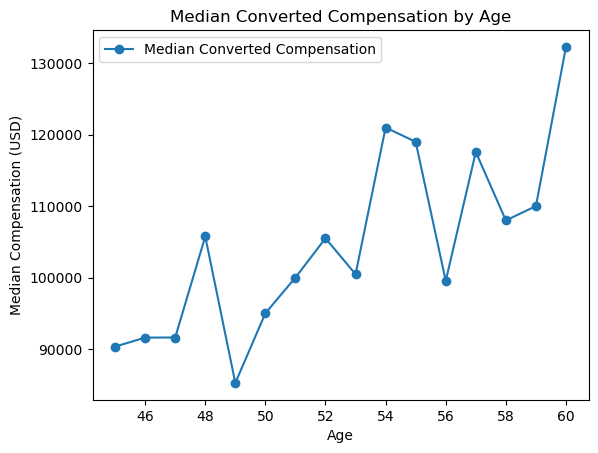

In [241]:
plt.plot(Age, MedianConvertedComp, marker='o', label='Median Converted Compensation')
# Adding labels and title
plt.xlabel('Age')
plt.ylabel('Median Compensation (USD)')
plt.title('Median Converted Compensation by Age')
plt.legend()
# Display the plot
plt.show()

In [137]:
import textwrap

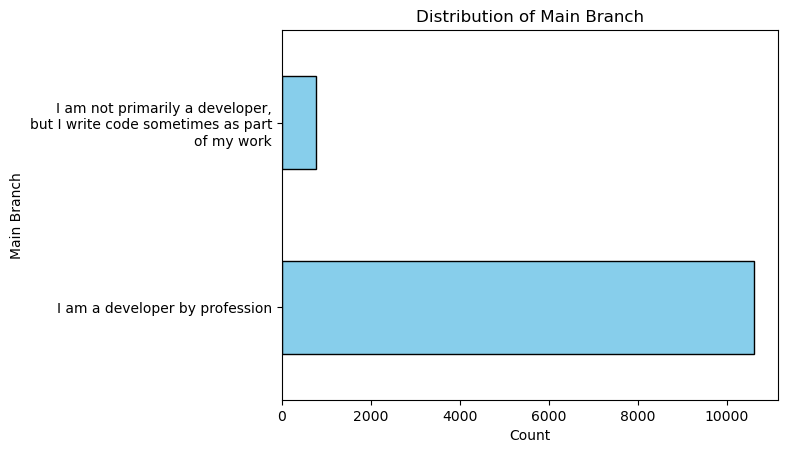

In [138]:
#Create a horizontal bar chart using column `MainBranch.`
query= """ SELECT MainBranch FROM master;"""
df1=pd.read_sql_query(query,conn)
df1['MainBranch'] = df1['MainBranch'].apply(lambda x: '\n'.join(textwrap.wrap(x, width=34)))
branch_counts = df1['MainBranch'].value_counts()
branch_counts.plot.barh(color='skyblue', edgecolor='black')
plt.xlabel('Count')
plt.ylabel('Main Branch')
plt.title('Distribution of Main Branch')
plt.show()

In [209]:
QUERY = """SELECT * FROM master"""
df = pd.read_sql(QUERY,conn)

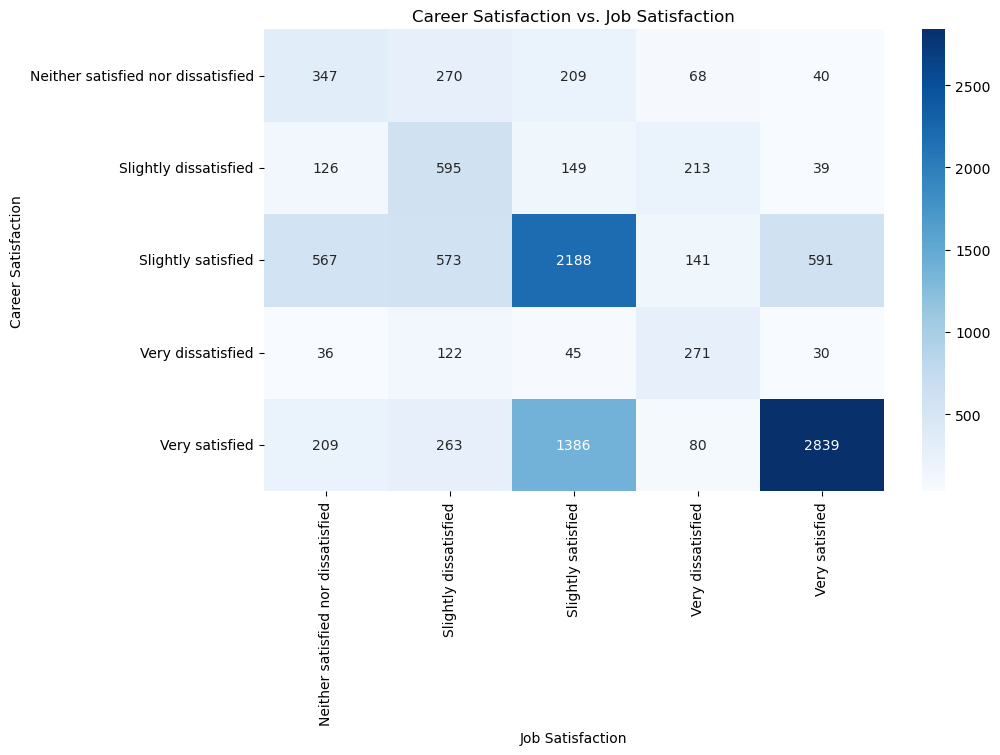

In [212]:
pivot_table = pd.pivot_table(df, index='CareerSat', columns='JobSat', values='Respondent', aggfunc='count', fill_value=0)

# Plotting
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='Blues', fmt='g')
plt.title('Career Satisfaction vs. Job Satisfaction')
plt.xlabel('Job Satisfaction')
plt.ylabel('Career Satisfaction')
plt.show()

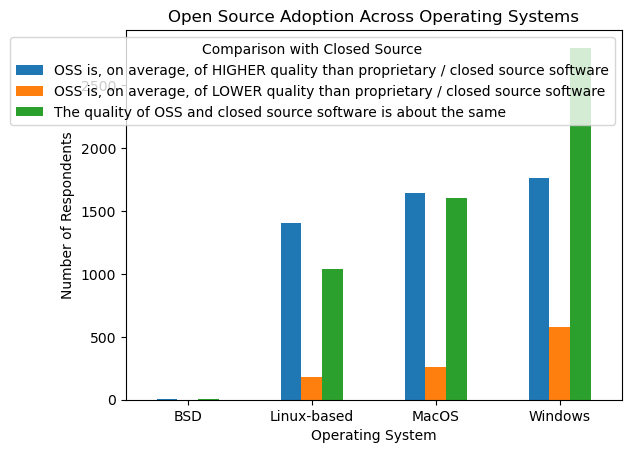

In [214]:
pivot_table = pd.pivot_table(df, index='OpSys', columns='OpenSource', values='Respondent', aggfunc='count', fill_value=0)

# Plotting
pivot_table.plot(kind='bar')
plt.title('Open Source Adoption Across Operating Systems')
plt.xlabel('Operating System')
plt.ylabel('Number of Respondents')
plt.legend(title='Comparison with Closed Source')
plt.xticks(rotation=0)
plt.show()

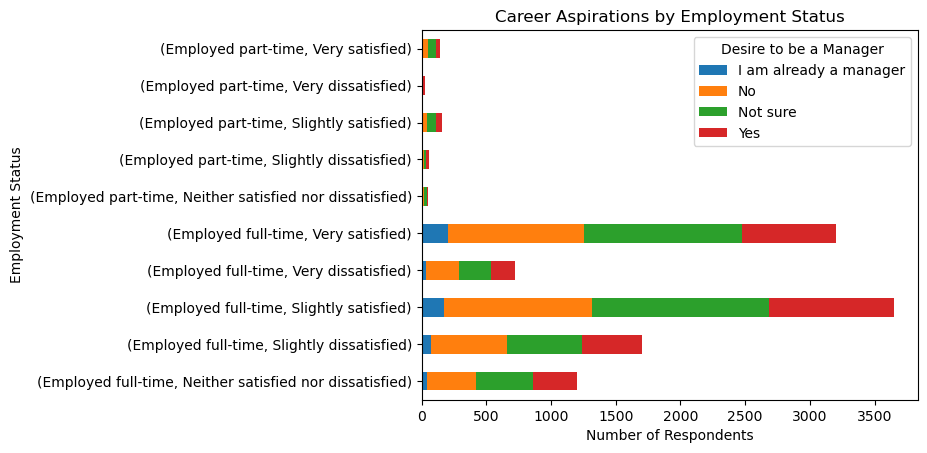

In [215]:
pivot_table =pd.pivot_table(df, index=['Employment', 'JobSat'], columns='MgrWant', values='Respondent', aggfunc='count', fill_value=0)

# Plotting
pivot_table.plot(kind='barh', stacked=True)
plt.title('Career Aspirations by Employment Status')
plt.ylabel('Employment Status')
plt.xlabel('Number of Respondents')
plt.legend(title='Desire to be a Manager')
plt.yticks(rotation=0)
plt.show()

In [225]:
query= """ SELECT * FROM DevType;"""
df4=pd.read_sql_query(query,conn)
#df4.plot.box()
df4['DevType'].value_counts()
#with pd.option_context('display.max_columns', None):
    #display(df4)

DevType
Developer, full-stack                            6928
Developer, back-end                              6290
Developer, front-end                             3920
Developer, desktop or enterprise applications    2575
Developer, mobile                                1959
DevOps specialist                                1639
Database administrator                           1413
System administrator                             1202
Designer                                          988
Developer, QA or test                             911
Developer, embedded applications or devices       854
Engineer, data                                    832
Data scientist or machine learning specialist     803
Data or business analyst                          802
Student                                           766
Academic researcher                               556
Educator                                          514
Product manager                                   480
Developer, game or g

In [139]:
conn.close()